In [4]:
import os
import re
import pandas as pd
from matplotlib import pyplot as plt
def extract_max_val_accuracy(results_folder):
    """
    Scans the given folder for CSV files named like 'sub-15_ses-02_*.csv',
    reads each file, and extracts the maximum 'sparse_val_accuracy' along with subject and session.

    Parameters:
    - results_folder (str): Path to the directory containing CSV result files.

    Returns:
    - pd.DataFrame: A DataFrame with columns ['subject', 'session', 'max_sparse_val_accuracy'].
    """
    # Pattern to extract subject and session from filename
    pattern = re.compile(r"sub-(?P<sub>\d+)_ses-(?P<ses>\d+)_.*\st.csv$")

    records = []
    # Iterate through files in the folder
    for fname in os.listdir(results_folder):
        match = pattern.match(fname)
        if not match:
            continue  # skip non-matching files

        sub = int(match.group('sub'))
        ses = int(match.group('ses'))
        file_path = os.path.join(results_folder, fname)

        # Load CSV
        df = pd.read_csv(file_path)
        if 'val_sparse_categorical_accuracy' not in df.columns:
            raise KeyError(f"File {fname} does not contain 'sparse_val_accuracy' column.")

        # Extract max sparse_val_accuracy
        max_acc = df['val_sparse_categorical_accuracy'].max()

        records.append({
            'subject': sub,
            'session': ses,
            'val_sparse_categorical_accuracy': max_acc
        })

    # Compile results into DataFrame
    result_df = pd.DataFrame.from_records(records)
    # Optional: sort by subject and session
    result_df = result_df.sort_values(['subject', 'session']).reset_index(drop=True)
    return result_df



In [5]:
results = extract_max_val_accuracy('DecodingResults')

KeyError: 'subject'

In [3]:
results

NameError: name 'results' is not defined

In [20]:
def plot_accuracy_per_subject(df):
    """
    Plots the maximum sparse validation accuracy per subject.

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'subject' and 'max_sparse_val_accuracy'.
    """
    import seaborn as sns
    subject_acc = df.groupby('subject')['val_sparse_categorical_accuracy'].mean().reset_index()
    subject_acc = subject_acc.sort_values('val_sparse_categorical_accuracy')

    plt.figure(figsize=(12, 6))
    palette = sns.color_palette("viridis", len(subject_acc))
    sns.barplot(x='subject', y='val_sparse_categorical_accuracy', data=subject_acc, palette=palette)

    plt.xlabel('Subject', fontsize=12)
    plt.ylabel('Validation Accuracy', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('overt_covert_rest_accuracy.png', dpi=600)

/tmp/ipykernel_1560747/3648654882.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subject', y='val_sparse_categorical_accuracy', data=subject_acc, palette=palette)


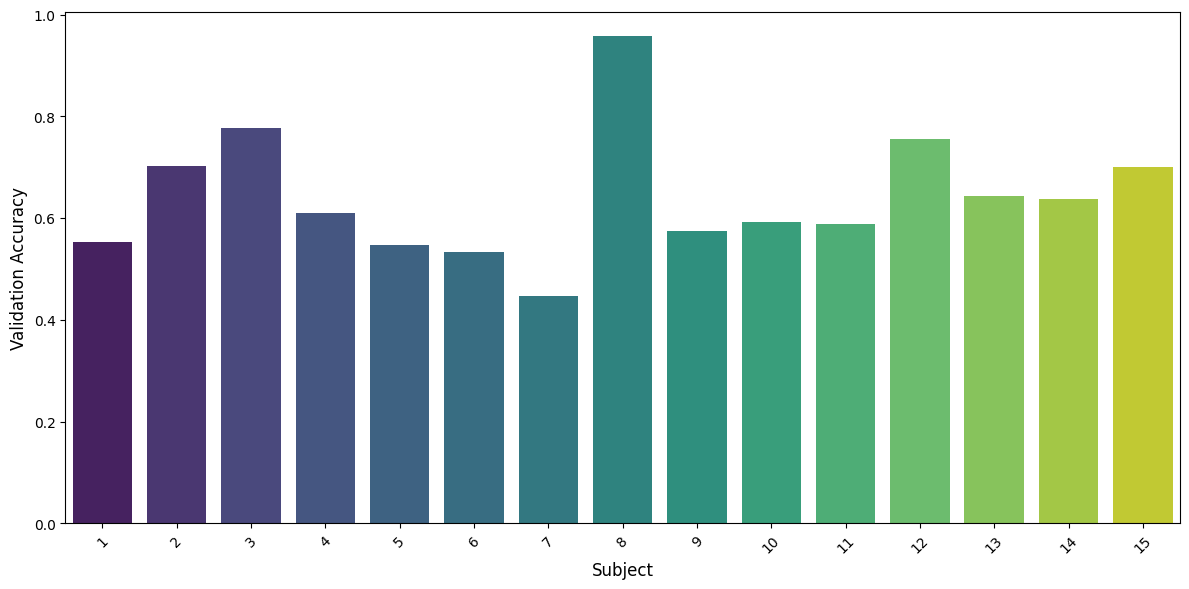

In [21]:
plot_accuracy_per_subject(results)